# KIVA CAPSTONE PROJECT - EXPLORATORY DATA ANALYSIS - EXTRA VARIABLES

Here is the code for the visualisations that can be found in the presentation, as well as the Natural Language Processing done with the text variables.

 
 
 
 
 *** 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
%matplotlib inline
pd.set_option("max_columns", 100)

In [2]:
loans = pd.read_csv('/Users/nicolas/Downloads/loans2_data_cleaned.csv',low_memory=False)

In [3]:
loans.columns

Index(['Unnamed: 0', 'original_language', 'description', 'loan_amount',
       'status', 'activity_name', 'sector_name', 'loan_use', 'country_name',
       'town_name', 'currency_policy', 'currency_exchange_coverage_rate',
       'currency', 'partner_id', 'posted_time', 'planned_expiration_time',
       'lender_term', 'tags', 'borrower_pictured', 'repayment_interval',
       'distribution_model', 'time', 'delinquency', 'default_rate',
       'rural_pct', 'has_video', 'number_of_borrowers', 'gender_categories',
       'days_of_campaign_duration'],
      dtype='object')

In [4]:
loans.drop(columns=['Unnamed: 0'],inplace=True)

In [5]:
loans.dtypes

original_language                   object
description                         object
loan_amount                        float64
status                               int64
activity_name                       object
sector_name                         object
loan_use                            object
country_name                        object
town_name                           object
currency_policy                     object
currency_exchange_coverage_rate     object
currency                            object
partner_id                         float64
posted_time                         object
planned_expiration_time             object
lender_term                        float64
tags                                object
borrower_pictured                   object
repayment_interval                  object
distribution_model                  object
time                                 int64
delinquency                        float64
default_rate                       float64
rural_pct  

## DEFAULT RATE

In [6]:
main_defaults = loans.default_rate.value_counts().head(60).sort_values(ascending=False)

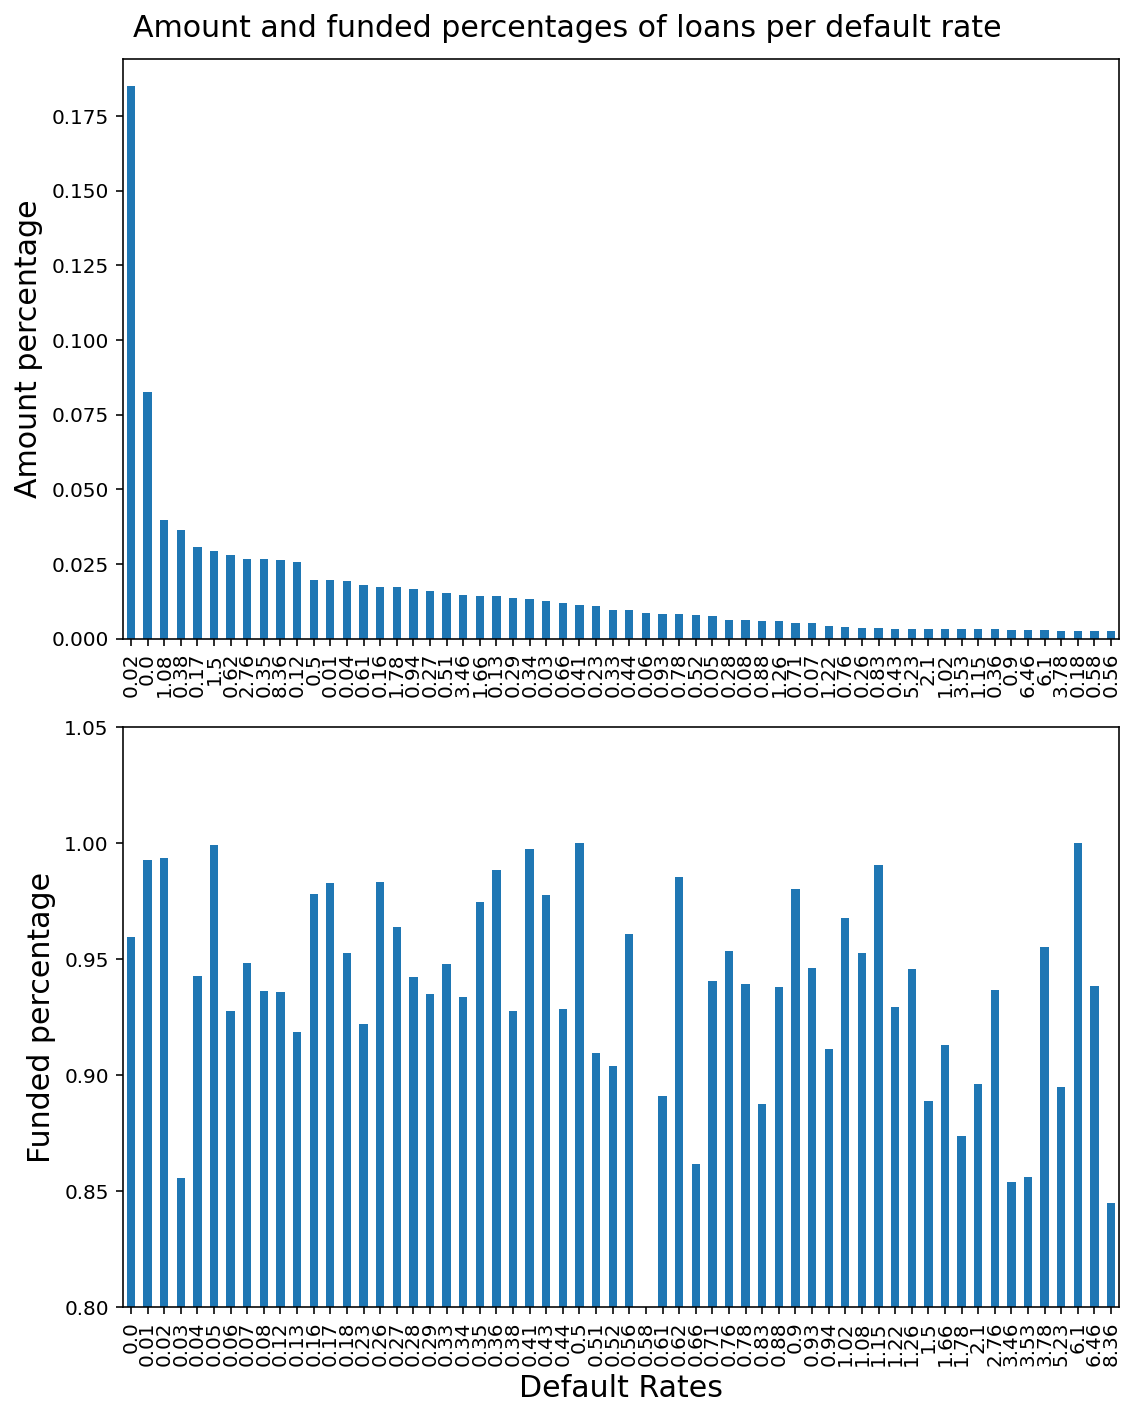

In [7]:
fig,(ax,ax1) = plt.subplots(nrows = 2,figsize=(8,10))
loans.default_rate.value_counts(normalize=True).head(60).plot(kind='bar',ax=ax)
loans.groupby('default_rate')['status'].mean().loc[main_defaults.index.sort_values(ascending=True)].plot(kind='bar',ax=ax1)
fig.suptitle('Amount and funded percentages of loans per default rate',fontsize=15)
ax.set_ylabel('Amount percentage',fontsize=15)
ax1.set_ylabel('Funded percentage',fontsize=15)
ax1.set_xlabel('Default Rates',fontsize=15)
ax1.set_ylim(0.8)
plt.tight_layout()
plt.show()

## TIME

In [8]:
main_times = loans.time.value_counts().head(60)

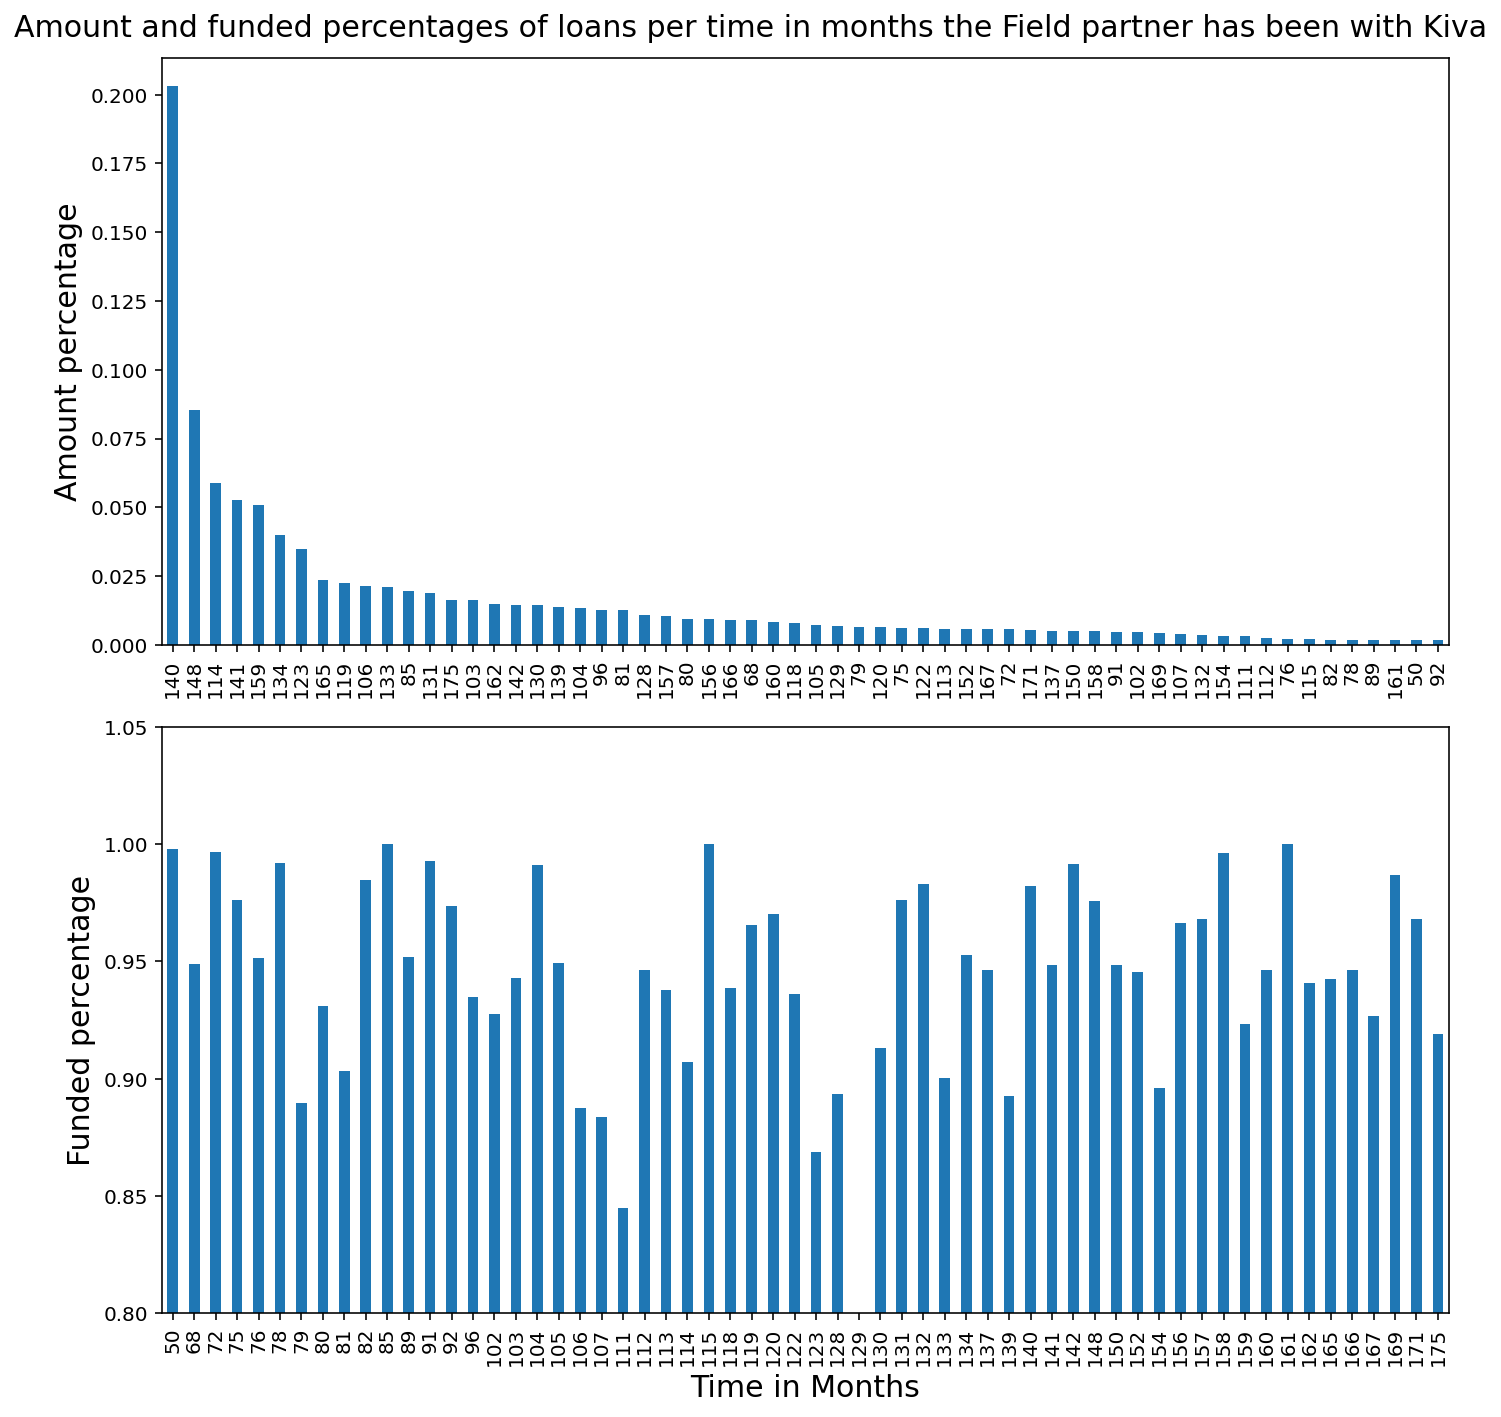

In [9]:
fig,(ax,ax1) = plt.subplots(nrows = 2,figsize=(10,10))
loans.time.value_counts(normalize=True).head(60).plot(kind='bar',ax=ax)
loans.groupby('time')['status'].mean().loc[main_times.index.sort_values(ascending=True)].plot(kind='bar',ax=ax1)
fig.suptitle('Amount and funded percentages of loans per time in months the Field partner has been with Kiva',fontsize=15)
ax.set_ylabel('Amount percentage',fontsize=15)
ax1.set_ylabel('Funded percentage',fontsize=15)
ax1.set_xlabel('Time in Months',fontsize=15)
ax1.set_ylim(0.8)
plt.tight_layout()
plt.show()

## DELINQUENCY

In [10]:
main_delinquencies = loans.delinquency.value_counts().head(60)

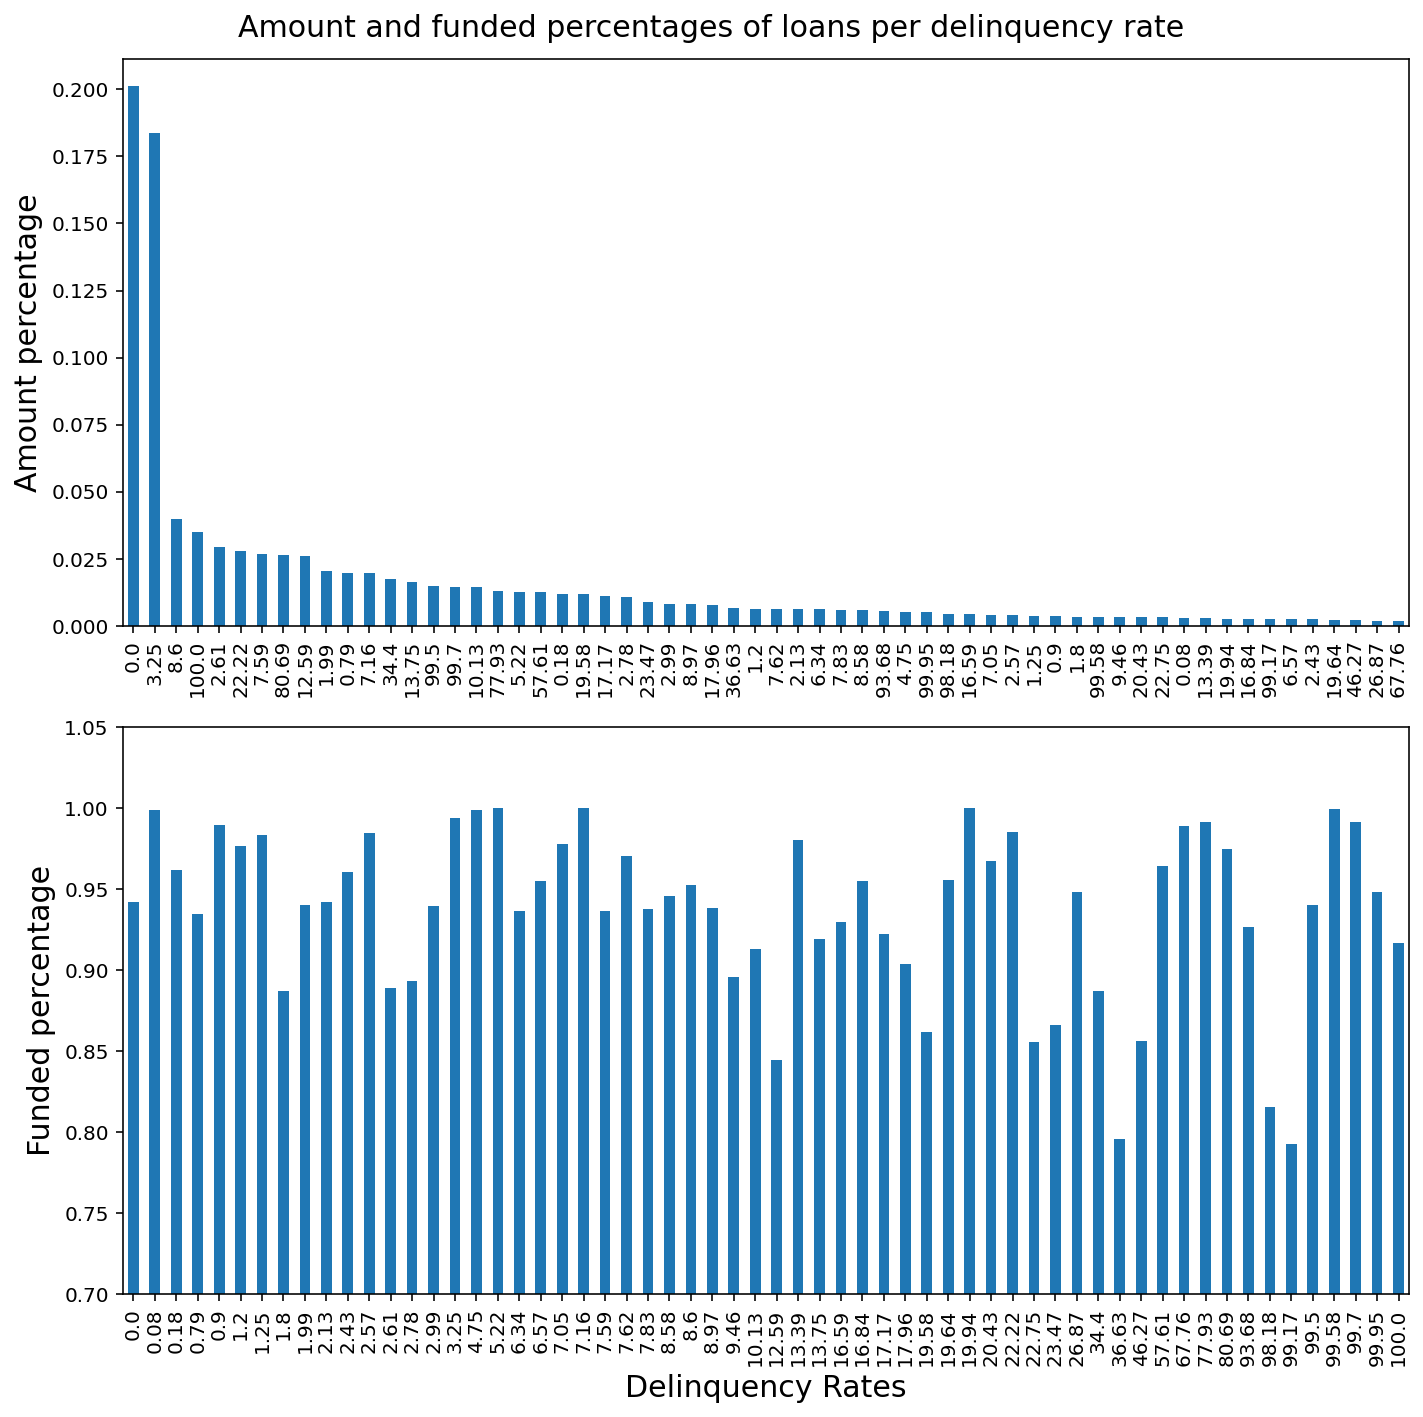

In [11]:
fig,(ax,ax1) = plt.subplots(nrows = 2,figsize=(10,10))
loans.delinquency.value_counts(normalize=True).head(60).plot(kind='bar',ax=ax)
loans.groupby('delinquency')['status'].mean().loc[main_delinquencies.index.sort_values(ascending=True)].plot(kind='bar',ax=ax1)
fig.suptitle('Amount and funded percentages of loans per delinquency rate',fontsize=15)
ax.set_ylabel('Amount percentage',fontsize=15)
ax1.set_ylabel('Funded percentage',fontsize=15)
ax1.set_xlabel('Delinquency Rates',fontsize=15)
ax1.set_ylim(0.7)
plt.tight_layout()
plt.show()

## RURAL PERCENTAGE

In [12]:
main_rural = loans.rural_pct.value_counts().head(40)

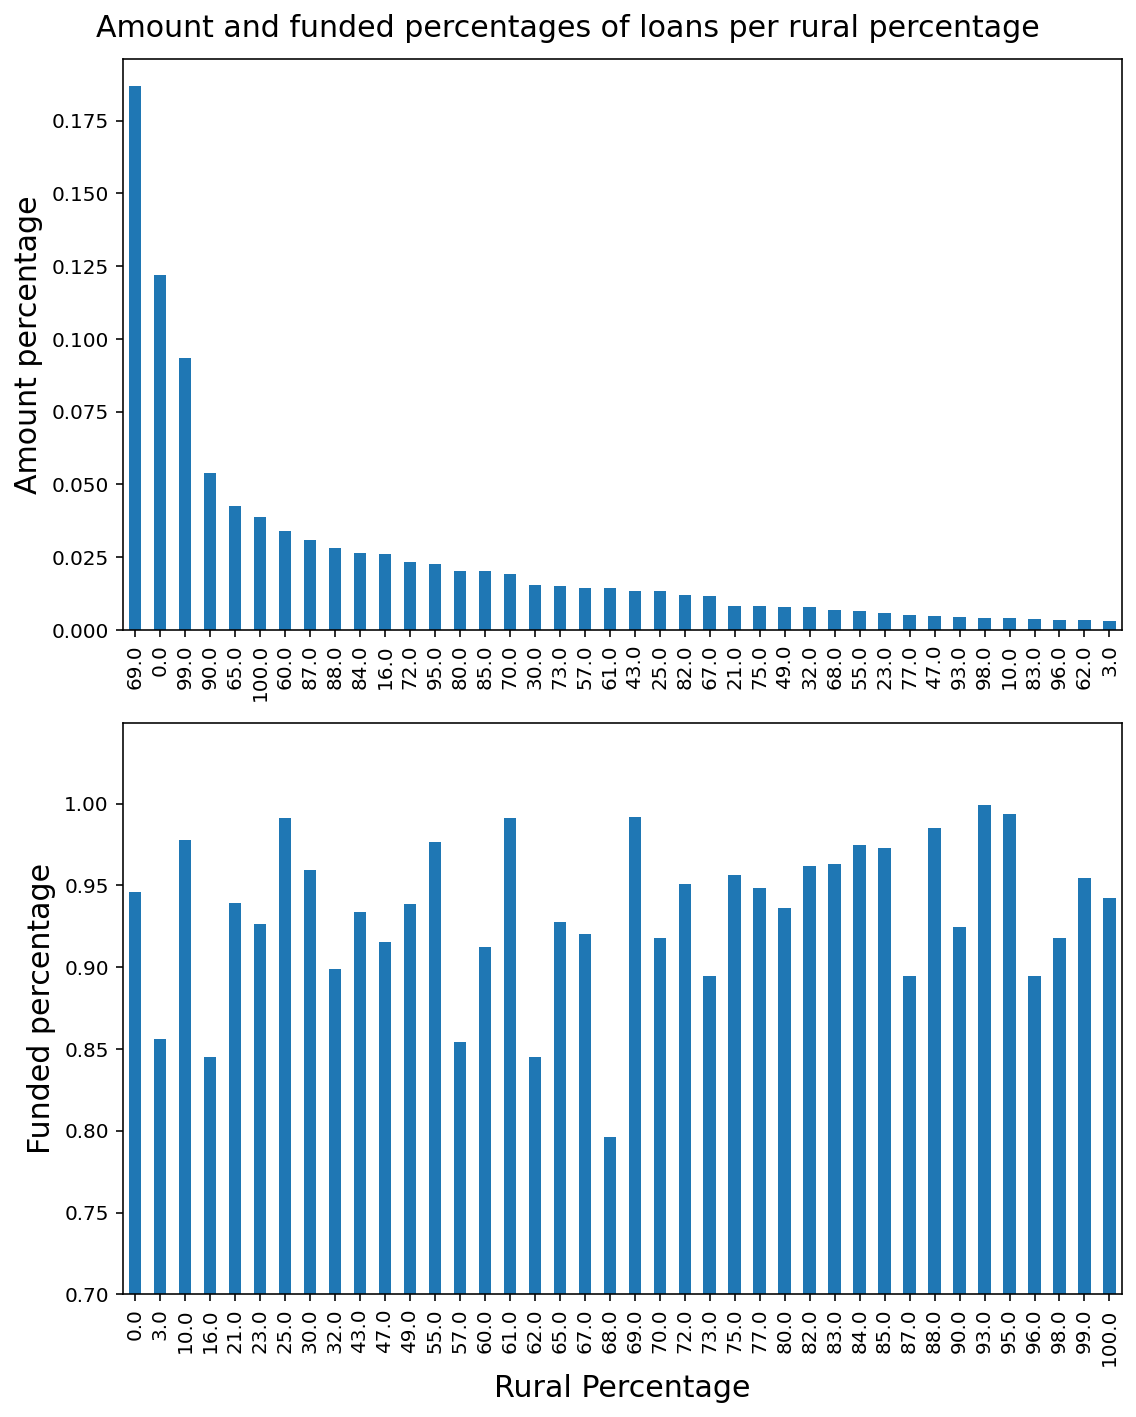

In [13]:
fig,(ax,ax1) = plt.subplots(nrows = 2,figsize=(8,10))
loans.rural_pct.value_counts(normalize=True).head(40).plot(kind='bar',ax=ax)
loans.groupby('rural_pct')['status'].mean().loc[main_rural.index.sort_values(ascending=True)].plot(kind='bar',ax=ax1)
fig.suptitle('Amount and funded percentages of loans per rural percentage',fontsize=15)
ax.set_ylabel('Amount percentage',fontsize=15)
ax1.set_ylabel('Funded percentage',fontsize=15)
ax1.set_xlabel('Rural Percentage',fontsize=15)
ax1.set_ylim(0.7)
plt.tight_layout()
plt.show()

## NATURAL LANGUAGE PROCESSING

### DESCRIPTIONS

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

cvec = CountVectorizer(stop_words=['english','to','as','and','such','his','the','etc','of','for','in','her','at','that','have','has','br','will','000','kiva','on','an','he','it','she','so','them','they','this','all','also','are','by','is','requesting','selling','their','with','works','working','philippines'],max_features = 75)
cvec.fit(loans['description'])
df = pd.DataFrame(cvec.transform(loans['description']).toarray(),
                  columns=cvec.get_feature_names())

In [15]:
df.columns

Index(['able', 'additional', 'be', 'because', 'been', 'business', 'buy', 'can',
       'children', 'customers', 'enough', 'expand', 'family', 'farm',
       'farming', 'food', 'four', 'from', 'future', 'good', 'group', 'hard',
       'help', 'home', 'hopes', 'house', 'husband', 'improve', 'income',
       'increase', 'life', 'like', 'lives', 'living', 'loan', 'loans',
       'married', 'money', 'more', 'mother', 'needs', 'not', 'now', 'nwtf',
       'old', 'one', 'order', 'other', 'pay', 'php', 'products', 'profits',
       'provide', 'purchase', 'requested', 'save', 'school', 'sell', 'sells',
       'store', 'support', 'three', 'through', 'two', 'use', 'very', 'wants',
       'was', 'which', 'who', 'woman', 'work', 'would', 'year', 'years'],
      dtype='object')

## LOAN USE

In [16]:
cvec1 = CountVectorizer(stop_words=['english','to','as','and','such','his','the','etc','of','for','in','her','at','that'],max_features = 50)
cvec1.fit(loans['loan_use'])
df1 = pd.DataFrame(cvec1.transform(loans['loan_use']).toarray(),
                  columns=cvec1.get_feature_names())

In [17]:
df1.columns

Index(['additional', 'build', 'business', 'buy', 'canned', 'care', 'clothes',
       'drinking', 'drinks', 'family', 'farm', 'feed', 'fees', 'fertilizer',
       'fertilizers', 'fish', 'flour', 'food', 'goods', 'groceries', 'improve',
       'increase', 'ingredients', 'inputs', 'items', 'like', 'maize', 'make',
       'materials', 'more', 'new', 'oil', 'other', 'pay', 'pigs', 'production',
       'products', 'provide', 'purchase', 'raise', 'rice', 'seeds', 'sell',
       'stock', 'store', 'sugar', 'supplies', 'toilet', 'vegetables', 'water'],
      dtype='object')

## HASHTAGS

In [18]:
cvec2 = CountVectorizer(stop_words=['english','ag','and'],max_features = 75)
cvec2.fit(loans['tags'])
df2 = pd.DataFrame(cvec2.transform(loans['tags']).toarray(),
                  columns=cvec2.get_feature_names())

In [19]:
df2.columns

Index(['animals', 'asset', 'biz', 'borrower', 'business', 'creator',
       'disbursed', 'durable', 'eco', 'education', 'elderly', 'fabrics',
       'family', 'female', 'first', 'fish', 'fp', 'friendly', 'gem', 'guys',
       'health', 'hidden', 'holding', 'immigrant', 'inspiring', 'interesting',
       'job', 'loan', 'low', 'married', 'orphan', 'owned', 'parent', 'photo',
       'post', 'powerful', 'pre', 'profit', 'refugee', 'renew', 'repair',
       'repeat', 'replace', 'reserved_crisis_support_loan', 'sanitation',
       'schooling', 'single', 'story', 'supporting', 'sustainable', 'team',
       'technology', 'tourism', 'trees', 'unique', 'unspecified', 'us',
       'user_favorite', 'user_like', 'vegan', 'volunteer_like',
       'volunteer_pick', 'widowed', 'woman'],
      dtype='object')

## PREPARE DATASET FOR MODELLING

### TARGET VARIABLE

Let's remind ourselves that we set the positive class as the majority 'funded' class for EDA purposes. However, now that EDA is done, we need to set the minority 'expired' class as the positive class for modelling.

In [20]:
loans.status.value_counts()

1    1382664
0      75913
Name: status, dtype: int64

In [21]:
loans.loc[loans[loans.status == 1].index,'status'] = 'funded'
loans.loc[loans[loans.status == 0].index,'status'] = 'expired'

In [22]:
#SET POSITIVE
loans['status'] = loans.status.map(lambda x: 0 if 'funded' in x else 1)

In [23]:
loans.status.value_counts()

0    1382664
1      75913
Name: status, dtype: int64

### CONCATENATIONS AND DUMMIFICATIONS

In [25]:
from datetime import timedelta
loans['posted_time'] = pd.to_datetime(loans['posted_time'])
loans['planned_expiration_time'] = pd.to_datetime(loans['planned_expiration_time'])
loans['posted_time_day_of_the_month'] = loans.posted_time.dt.day
loans['posted_time_day_of_the_week'] = loans.posted_time.dt.weekday
loans['posted_time_month'] = loans.posted_time.dt.month
loans['posted_time_year'] = loans.posted_time.dt.year
loans['expiration_time_day_of_the_month'] = loans.planned_expiration_time.dt.day
loans['expiration_time_day_of_the_week'] = loans.planned_expiration_time.dt.weekday
loans['expiration_time_month'] = loans.planned_expiration_time.dt.month
loans['expiration_time_year'] = loans.planned_expiration_time.dt.year
loans['posted_time_hour'] = loans.posted_time.dt.hour

In [26]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458577 entries, 0 to 1458576
Data columns (total 37 columns):
 #   Column                            Non-Null Count    Dtype              
---  ------                            --------------    -----              
 0   original_language                 1458577 non-null  object             
 1   description                       1458577 non-null  object             
 2   loan_amount                       1458577 non-null  float64            
 3   status                            1458577 non-null  int64              
 4   activity_name                     1458577 non-null  object             
 5   sector_name                       1458577 non-null  object             
 6   loan_use                          1458577 non-null  object             
 7   country_name                      1458577 non-null  object             
 8   town_name                         1458577 non-null  object             
 9   currency_policy                   1

In [27]:
loans = loans.reset_index()

In [28]:
#CONCAT NLP DF'S
loans = pd.concat([loans,df,df1,df2],axis=1)

In [29]:
loans.drop(columns=['description','loan_use','tags','planned_expiration_time','posted_time'],inplace=True)

In [32]:
cat_cols = ['original_language',
 'activity_name',
 'sector_name',
 'country_name',
 'town_name',
 'currency_policy',
 'currency_exchange_coverage_rate',
 'currency',
'borrower_pictured',
 'repayment_interval',
 'distribution_model',
 'gender_categories']

In [33]:
#DUMMIFY
loans = pd.get_dummies(loans,columns=cat_cols)

In [34]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458577 entries, 0 to 1458576
Columns: 854 entries, index to gender_categories_male
dtypes: float64(6), int64(204), uint8(644)
memory usage: 3.2 GB


In [35]:
loans.to_csv('loans2_data_modelling.csv')